In [1]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
import matplotlib.pyplot
%matplotlib inline

# neural network class definition
class neuralNetwork:
    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputNodes
        self.hnodes = hiddenNodes
        self.onodes = outputNodes
        # learning rate
        self.lr = learningRate
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
#         self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
#         self.who = (numpy.random.rand(self.onodes, self.hnodes) - 0.5)
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        self.activation_function = lambda x: scipy.special.expit(x)
        pass

    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)) , numpy.transpose(hidden_outputs))
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        pass

    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

In [2]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
# learning rate is 0.3
learning_rate = 0.3
# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [3]:
training_data_file = open("mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

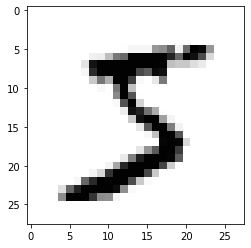

In [37]:
all_values = training_data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow( image_array, cmap='Greys',interpolation='None')

In [11]:
# train the neural network
# go through all records in the training data set
for record in training_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # create the target output values (all 0.01, except the desired label which is 0.99)
    targets = numpy.zeros(output_nodes) + 0.01
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [5]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

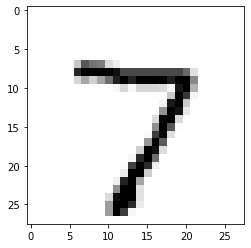

In [38]:
all_values = test_data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow( image_array, cmap='Greys',interpolation='None')

In [40]:
n.query(numpy.asfarray(all_values[1:]))

array([[1.23123239e-01],
       [2.30147384e-03],
       [1.49279928e-02],
       [2.40513759e-02],
       [1.02893746e-02],
       [1.42320832e-02],
       [7.76121345e-04],
       [9.92643117e-01],
       [3.84825775e-03],
       [1.29409645e-02]])

In [12]:
# test the neural network
# scorecard for how well the network performs, initially empty
scorecard = []
# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    print(label, "network's answer")
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
4 network's answer
5 correct label
4 network's answer
9 correct label
7 network's answer


In [13]:
print(scorecard)
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
performance =  0.7


In [27]:
# test the neural network with origin train data
scorecard = []
# go through all the records in the test data set
for record in training_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    #print(correct_label, "correct label")
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    #print(label, "network's answer")
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass

# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance with train data = ", scorecard_array.sum() / scorecard_array.size)

performance with train data =  0.14


## -----------------------------------100小数据集部分结束---------------------------------------------------------------

In [15]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [16]:
train_inputs = train_data.drop(['label'], axis=1)
train_targets = train_data['label']
test_inputs = test_data.values
# todo convert train_inputs to 28*28 array, train_targets to onehot
train_input_data = (train_inputs.values / 255.0 * 0.99) + 0.01
train_target_data = train_targets.values

In [34]:
# train the neural network
# go through all records in the training data set
for inx, inputs in enumerate(train_input_data):
    # create the target output values (all 0.01, except the desired label which is 0.99)
    targets = numpy.zeros(output_nodes) + 0.01
    targets[int(train_target_data[inx])] = 0.99
    n.train(inputs, targets)
    pass

In [35]:
# test the neural network
# scorecard for how well the network performs, initially empty
scorecard = []
# go through all the records in the test data set
for inx, inputs in enumerate(train_input_data):
    # correct answer is first value
    correct_label = int(train_target_data[inx])
    #print(correct_label, "correct label")
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    #print(label, "network's answer")
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        #print(correct_label, "correct label", label, "network's answer")
        scorecard.append(0)
        pass
    pass

# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance with train data = ", scorecard_array.sum() / scorecard_array.size)

performance with train data =  0.9586666666666667
